# Research on Car Sales Ads

<h2>Project Description

At Crankshaft List, hundreds of free advertisements for vehicles are published on the site every day.
We are studying data collected over the last few years and determine which factors influence the price of a vehicle. 

<h2>Open the data file and study the general information. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/datasets/vehicles_us.csv')

#Studying the general information and also identifying null values
print(data.describe())
data.info()
data.head()



               price    model_year     cylinders       odometer   is_4wd  \
count   51525.000000  47906.000000  46265.000000   43633.000000  25572.0   
mean    12132.464920   2009.750470      6.125235  115553.461738      1.0   
std     10040.803015      6.282065      1.660360   65094.611341      0.0   
min         1.000000   1908.000000      3.000000       0.000000      1.0   
25%      5000.000000   2006.000000      4.000000   70000.000000      1.0   
50%      9000.000000   2011.000000      6.000000  113000.000000      1.0   
75%     16839.000000   2014.000000      8.000000  155000.000000      1.0   
max    375000.000000   2019.000000     12.000000  990000.000000      1.0   

       days_listed  
count  51525.00000  
mean      39.55476  
std       28.20427  
min        0.00000  
25%       19.00000  
50%       33.00000  
75%       53.00000  
max      271.00000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           5

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


<h4> Conclusion

There are null values in `model_year`, `cylinders`, `odometer`, `paint_color`and `is_4wd` columns, hence the values less than 51525.<br>
The datatypes could be better say `price` can be float and `model_year`,`cylinders`,`is_4wd` can be int.<br>
Also when checked manually noticed that `price` went to the minimum of 1,probably that might be something to do with an offer, for example - down payment price

<h2>Data preprocessing

<h3>Filling Null Values and Changing Datatypes 

In [2]:
#Filling null values in model_year based on model
data['model_year'] = data.groupby(['model'], sort=False)['model_year'].apply(lambda x: x.fillna(x.median()))

#Filling null values in cylinders based on type
data['cylinders'] = data.groupby(['type'], sort=False)['cylinders'].apply(lambda x: x.fillna(x.median()))

#Filling null values in is_4wd with 0 as the filled values only contained the value 1
data['is_4wd'] = data['is_4wd'].fillna(value = 0)

#Filling null values in odometer based on condition and date_posted
data['odometer'] = data.groupby(['condition','date_posted'], sort=False)['odometer'].apply(lambda x: x.fillna(x.median()))

#Filling null values in paint_color column based on model
data['paint_color'] = data.groupby('model')['paint_color'].apply(lambda x: x.fillna(x.mode().iloc[0]))

#Changing Datatypes of Price to float ; model_year,cylinders,is_4wd to int and date_posted to datetime
data['price'] = data['price'].astype('float')
data['model_year'] = data['model_year'].astype('int')
data['cylinders'] = data['cylinders'].astype('int')
data['is_4wd'] = data['is_4wd'].astype('int')
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%dT%H:%M:%S')

#Checking for updated datatypes
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null float64
model_year      51525 non-null int64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null int64
fuel            51525 non-null object
odometer        51494 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null int64
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 5.1+ MB


<b>Conclusion</b>

<em><strong>Missing Values</em><br>
- Filled null values in `model_year` based on `model` values.<br>
- Filled null values in `cylinders` based on  `type` values as this cab be the factor that might determine the power required in an engine <br>
- Filled null values in `is_4wd` as 0 assuming the missing values are false based on the observation that all the pre-existing values are that of 1.  <br>
- Filled null values in `paint_color` based on `model` values.  <br>
- Filled null values in `odometer` based on `condition` and `date_posted` values as these are the responsible factors which reflect the vehicle's mileage.  <br>
    `odometer` value might be missing as they might have not noted it when the vehicle was brought in.
    `paint_color` values was missed as they might not have recognized the exact color.
    the remaining missing values might be outcome of insufficient knowledge.
    

<em><strong>Changing Datatpes</em><br>
Changed the datatypes of `price` to float and `model_year`,`cylinders` and `is_4wd` to int.<br>
Also changed the datatype of `date_posted` to datetime

<h2>Make calculations and add them to the table and map condition strings to numbers

In [3]:
#Calculated the Day of the week, month, and year the ad was placed

data['day'] = pd.DatetimeIndex(data['date_posted']).day
data['month'] = pd.DatetimeIndex(data['date_posted']).month
data['year'] = pd.DatetimeIndex(data['date_posted']).year

#Calculated the vehicle's age (in years) when the ad was placed
data['vehicle_age'] = data['year'] - data['model_year']
data.loc[data['vehicle_age']<=0, 'vehicle_age'] = 1


#Calculated the vehicle's average mileage per year
data['mileage'] = data['odometer'] / data['vehicle_age']

#Replaced the string conditions with respective numeric condition
di = {'new':5,'like new':4,'excellent':3,'good':2,'fair':1,'salvage':0}
data['condition'].replace(di, inplace = True)
data.head()




,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year,vehicle_age,mileage
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,black,1,2018-06-23,19,23,6,2018,7,20714.285714
1,25500.0,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,19,10,2018,7,12672.142857
2,5500.0,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,7,2,2019,6,18333.333333
3,1500.0,2003,ford f-150,1,8,gas,170519.0,automatic,pickup,white,0,2019-03-22,9,22,3,2019,16,10657.437500
4,14900.0,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2,4,2019,2,40451.500000


<h4> Conclusion

Calculated and set new columns - `day`,`month`,`year`,`vehicle_age` and `mileage`<br>
- Since there are rows with same `model_year` and `year`, the age results into zero. Hence changed the value to 1 as they are practically in year 1.<br>
- Replaced `condition` string values with a numeric scale using dictionary:new = 5,like new = 4,excellent = 3,good = 2,fair = 1,salvage = 0

<h2>Carry out exploratory data analysis

<h3>Plotting Histograms for Price, Vehicle's Age, Vehicle's Mileage, Cylinders and Condition respectively

Histogram for Vehicle's  price


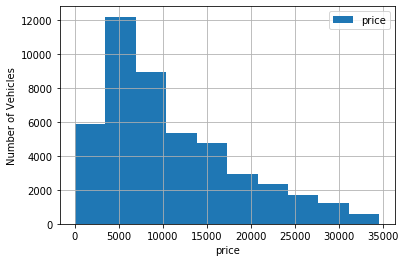

Histogram for Vehicle's  vehicle_age


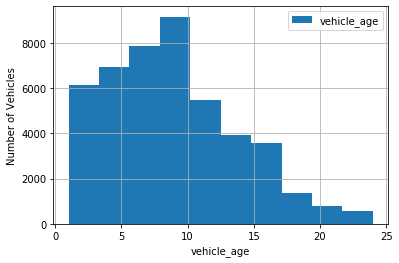

Histogram for Vehicle's  mileage


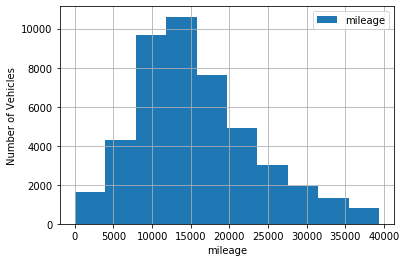

Histogram for Vehicle's  cylinders


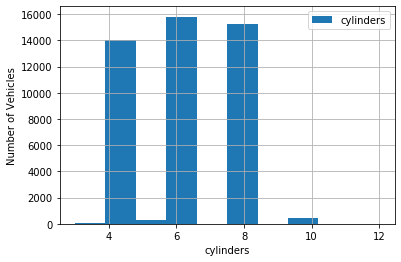

Histogram for Vehicle's  condition


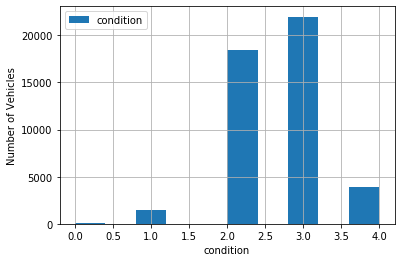

In [24]:
#Histogram for price, Vehicle's Age, Vehicle's Mileage, Cylinders and Condition respectively

for column in data[['price', 'vehicle_age','mileage','cylinders','condition']]:
    hist_plot = data[[column]].plot(kind = 'hist',grid = True)
    print("Histogram for Vehicle's ",column)
    hist_plot.set_xlabel(column)
    hist_plot.set_ylabel("Number of Vehicles")
    plt.show()


<b>Conclusion

We are not seeing anything significant on the extreme right end of the x-axis, there are only peaks in the beginning and/or in the middle of the histograms. Thus there maybe a higher amount of upper outliers.<br>
- `Price`But for price there is a peak at 0. It is strange to see vehicles being sold for that low price. It is possible that the vehicles are being financed, hence such low price.<br>
- `Vehicle_age` From the graph we see that there are 37000 vehicles that have ages vrying from 0-10 and around 12500 vehicles 10-23 years. The remaining extend upto more than 100<br>
- `Mileage` Around 50000 vehicles have a mileage ranging from 0 to 35000. And the remaining vehicles have a mileage of maximum of more than 350000<br>
- `Cylinders` Maximum number of vehicles have 8 cylinders. Mostly there are even number of cylinders. Rarely do vehicles have an odd number of cylinders<br>
- `Condition` Most of the vehicles are in excellent(3) condition, very few being in salvage (0) or new(5) condition




<h3>Finding upper limit of outliers and plotting histograms for updated data without upper outliers 

In [5]:
# Finding outliers
#outliers,IQR and upper limit for price
Q1_price = data['price'].quantile(0.25)
Q3_price = data['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
up_price = Q3_price + (1.5*IQR_price)

#outliers,IQR and upper limit for vehicle age
Q1_age = data['vehicle_age'].quantile(0.25)
Q3_age = data['vehicle_age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
up_age = Q3_age + (1.5*IQR_age)

#outliers,IQR and upper limit for mileage
Q1_mileage = data['mileage'].quantile(0.25)
Q3_mileage = data['mileage'].quantile(0.75)
IQR_mileage = Q3_mileage - Q1_mileage
up_mileage = Q3_mileage + (1.5*IQR_mileage)

#outliers,IQR and upper limit for cylinders
Q1_cylinders = data['cylinders'].quantile(0.25)
Q3_cylinders = data['cylinders'].quantile(0.75)
IQR_cylinders = Q3_cylinders - Q1_cylinders
up_cylinders = Q3_cylinders + (1.5*IQR_cylinders)

#outliers,IQR and upper limit for condition
Q1_condition = data['condition'].quantile(0.25)
Q3_condition = data['condition'].quantile(0.75)
IQR_condition = Q3_condition - Q1_condition
up_condition = Q3_condition + (1.5*IQR_condition)

#Saving upper limit of outliers in a seperate dataframe
#upper limit of outliers of price saved in price_updf
price_updf = data.query('price <= @up_price')

#upper limit of outliers of age saved in age_updf
age_updf = data.query('vehicle_age > @up_age')

#upper limit of outliers of mileage saved in mileage_updf
mileage_updf = data.query('mileage > @up_mileage')

#upper limit of outliers of cylinders saved in cylinders_updf
cylinders_updf = data.query('cylinders > @up_cylinders')

#upper limit of outliers of condition saved in condition_updf
condition_updf = data.query('condition > @up_condition')


#Removing upper limit outliers from the original dataframe
data = data.query('price <= @up_price and vehicle_age <= @up_age and mileage <= @up_mileage and cylinders <= @up_cylinders and condition <= @up_condition')




Histogram for Vehicle's  price


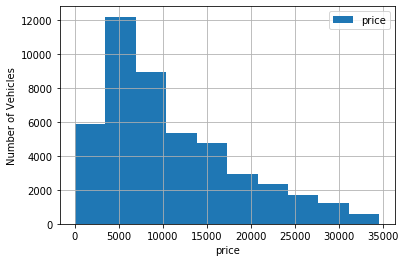

Histogram for Vehicle's  vehicle_age


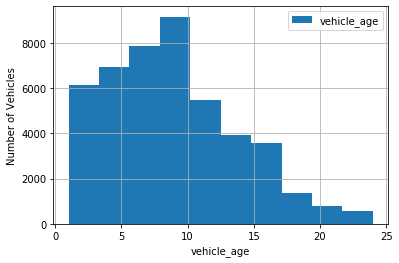

Histogram for Vehicle's  mileage


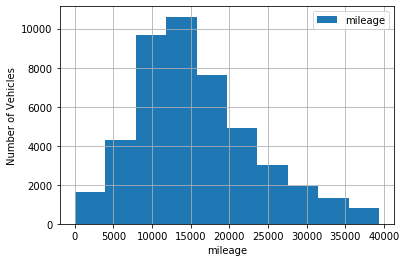

Histogram for Vehicle's  cylinders


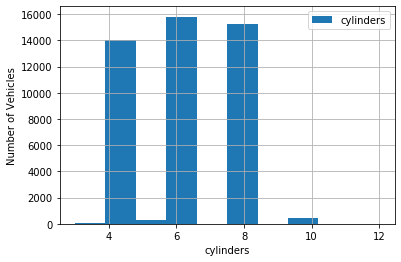

Histogram for Vehicle's  condition


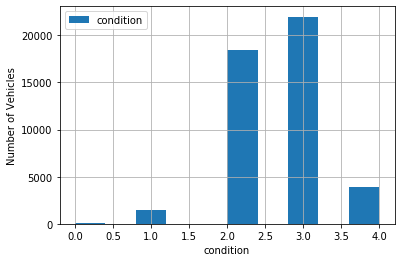

In [23]:


#Histogram for Updated Price, Vehicle's Age, Vehicle's Mileage, Cylinders and Condition respectively

for column in data[['price', 'vehicle_age','mileage','cylinders','condition']]:
    hist_plot = data[[column]].plot(kind = 'hist',grid = True)
    print("Histogram for Vehicle's ",column)
    hist_plot.set_xlabel(column)
    hist_plot.set_ylabel("Number of Vehicles")
    plt.show()


<b>Conclusion

After removing upper limit outliers from the data, we can now clearly see how the values are distributed. In the previous solution we could barely notice what is happending towards the end values. <br>
- Say for example in `Price` histogram we see a huge difference, initially we could only see a peak at 0, now we can notice where exactly where there were peaks : 3000-6000. <br>
- `Vehicle_age` we see that the there is a kind of uniform step increase in the no. of vehicles from age 2 to 10 years whereas previously we could only make out that there was a huge number of vehicles from 0-10.<br>
- `Mileage` Now we got to know where exactly was the peak - 15000,previously we just knew the range : 0-50000
- `Cylinders` and `Condition` histograms are pretty much the same as they had less number of listed values


<h3>Finding the number of days an ad is placed and also typical lifetime of an ad

the typical lifetime of an ad
count    45872.000000
mean        39.545169
std         28.234208
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

Mean of days_listed: 39.545169166376006

Median of days_listed: 33.0

Number of Ads that were removed quickly: 0
Number of Ads that were listed for abnormally long time: 1445


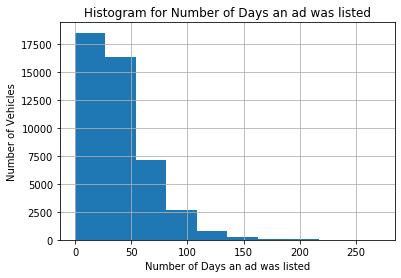

In [7]:
#Histogram the number of days an ad is placed
ad_days = data['days_listed'].plot(kind = 'hist',y ='days_listed', grid = True)
ad_days.set_title("Histogram for Number of Days an ad was listed")
ad_days.set_xlabel("Number of Days an ad was listed")
ad_days.set_ylabel("Number of Vehicles")


#Studying and describing days_listed i.e. the ad lifetime values
print('the typical lifetime of an ad')
print(data.days_listed.describe())


#Finding the mean of days_listed
print()
print('Mean of days_listed:',data.days_listed.mean())


#Finding the median of days_listed
print()
print('Median of days_listed:',data.days_listed.median())


#Finding IQR and both lower & upper outlier limit
Q1_days_listed = data['days_listed'].quantile(0.25)
Q3_days_listed = data['days_listed'].quantile(0.75)
IQR_days_listed = Q3_days_listed - Q1_days_listed
up_days_listed = Q3_days_listed + (1.5*IQR_days_listed)
down_days_listed = Q1_days_listed - (1.5*IQR_days_listed)


#Number of Ads that were removed quickly
print()
print('Number of Ads that were removed quickly:',len(data.query('days_listed < @down_days_listed')))

#Number of Ads that were listed for abnormally long time
days_listed_updf = data.query('days_listed > @up_days_listed')
print('Number of Ads that were listed for abnormally long time:',len(days_listed_updf))

<b>Conclusion

From the above histogram we can conclude that the typical lifetime of an ad is around 0-25 days.<br>
- From the describe method we see that there are total of 51525 `days_listed` values and the mean is 39.55476, std  is 28.20427,min is 0.00000,Q1 is 19.00000, median is 33.00000,Q3 is% 53.00000 and max is 271.00000 

<h3>Analyzing the number of ads and the average price for each type of vehicle

             Number of Ads  Average Price
type                                     
SUV                  11340   10033.493563
sedan                11240    6637.522598
truck                10522   14461.818190
pickup                6037   14242.920325
coupe                 1922   12786.750780
wagon                 1471    8640.165874
mini-van              1075    7548.735814
hatchback              958    6545.802714
van                    545    8262.089908
convertible            340   12715.738235
other                  220    9864.859091
offroad                179   13832.497207
bus                     23   17445.913043

The two types with the greatest number of ads are:
SUV
sedan


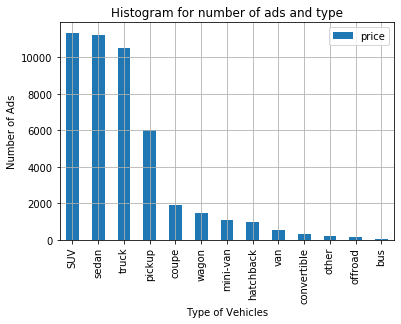

In [8]:
#Finding the number of ads and the average price for each type of vehicle
price_model_pivot = data.pivot_table(index = 'type', values = 'price', aggfunc = ['count','mean'])


#Plotting the histogram for number of ads for each type of vehicle
price_type_hist = price_model_pivot.sort_values(by = ('count', 'price'), ascending = False).plot(kind = 'bar', y = 'count', grid = True)
price_type_hist.set_title("Histogram for number of ads and type")
price_type_hist.set_xlabel("Type of Vehicles")
price_type_hist.set_ylabel("Number of Ads")


#Finding the top two type of vehicles by sorting the above pivot table
price_model_pivot.columns = ['Number of Ads', 'Average Price']
type_ads = price_model_pivot.sort_values(by = ('Number of Ads'), ascending = False)
print(type_ads)

#Printing out the top two types of vehicles
print()
print('The two types with the greatest number of ads are:')
print(type_ads.index[0])
print(type_ads.index[1])



<b>Conclusion</b>

Even though SUV and Sedan have the highest number of advertisements for them. They do not have the highest average price. That is with bus and truck respectively.

<h3>Factors that impact the Price on Top two types: SUV and Sedan

SUV


,transmission
automatic,10738
manual,462
other,140


,paint_color
black,2993
white,2004
silver,1948
grey,1227
blue,1066
red,848
green,455
brown,354
custom,291
orange,73


-----------SUV--------------------
Correlation between the price and on age:  -0.5691470813738652
Correlation between the price and on mileage:  0.25503410877498567
Correlation between the price and on condition:  0.27078536073912174


[Text(0, 0.5, 'price'),
 Text(0.5, 0, 'color of the vehicle'),
 Text(0.5, 1.0, 'and price for SUV')]

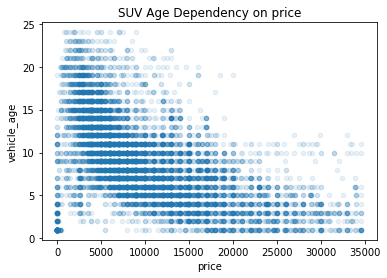

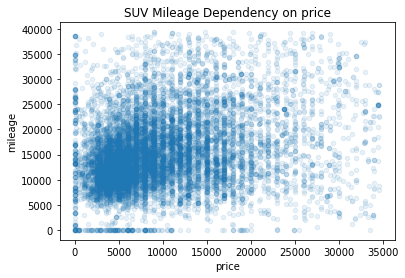

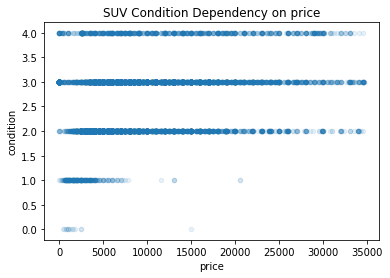

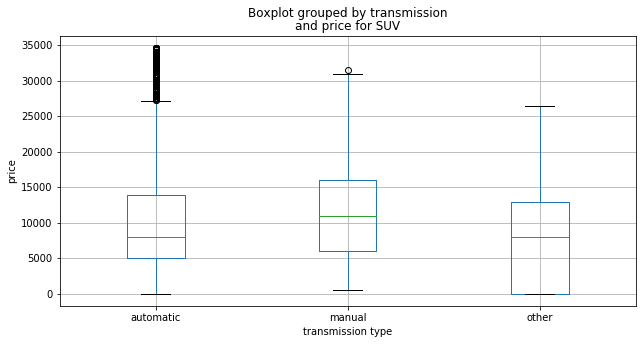

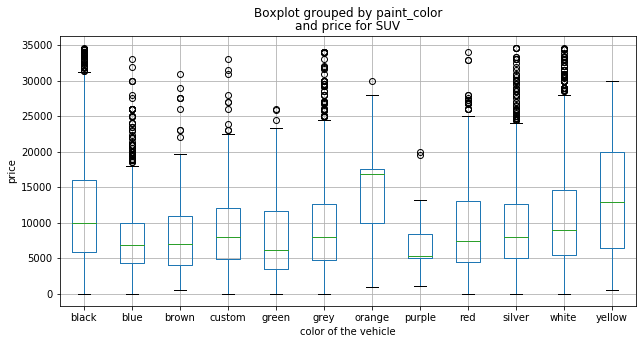

In [9]:
#Forming different dataframes for vehicle type SUV and sedan respectively
adtype1 = data[data['type']=='SUV']
adtype2 = data[data['type']=='sedan']


#Checking for number of ads for categorical values columns - transmission and paint_color
print('SUV')
display(adtype1['transmission'].value_counts().to_frame())
display(adtype1['paint_color'].value_counts().to_frame())


print('-----------SUV--------------------')
#Finding correlation between the price and on age, mileage, condition, transmission type, and color of SUVs
print('Correlation between the price and on age: ',adtype1['price'].corr(adtype1['vehicle_age']))
print('Correlation between the price and on mileage: ',adtype1['price'].corr(adtype1['mileage']))
print('Correlation between the price and on condition: ',adtype1['price'].corr(adtype1['condition']))

#SUV Scatter plot graphs for quantitative values
vehicle_age_SUV = adtype1.plot(x='price',y='vehicle_age',kind='scatter', alpha = 0.1, title = 'SUV Age Dependency on price')
mileage_SUV = adtype1.plot(x='price',y='mileage',kind='scatter', alpha = 0.1, title = 'SUV Mileage Dependency on price')
condition_SUV = adtype1.plot(x='price',y='condition',kind='scatter', alpha = 0.1, title = 'SUV Condition Dependency on price')

#SUV Boxplot for transmission type and paint_color respectively
adtype1.boxplot(column = ['price'], by = 'transmission' ,figsize = (10,5)).set(title='and price for SUV', xlabel='transmission type', ylabel='price')
adtype1.boxplot(column = ['price'], by = 'paint_color' ,figsize = (10,5)).set(title='and price for SUV', xlabel='color of the vehicle', ylabel='price')





Sedan


,transmission
automatic,10566
manual,565
other,109


,paint_color
silver,2770
black,2241
grey,1931
white,1394
blue,1235
red,890
custom,267
brown,250
green,205
purple,26


-----------Sedan-----------------
Correlation between the price and on age:  -0.6040314464969823
Correlation between the price and on mileage:  0.19369766224694626
Correlation between the price and on condition:  0.2963188319945143


[Text(0, 0.5, 'price'),
 Text(0.5, 0, 'color of the vehicle'),
 Text(0.5, 1.0, 'and price for Sedan')]

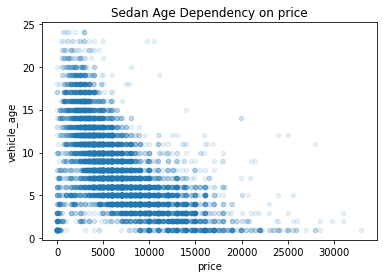

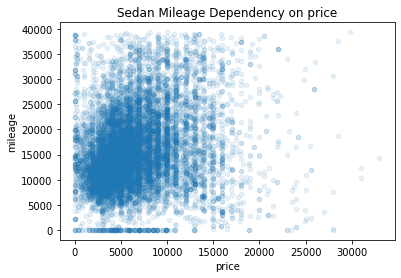

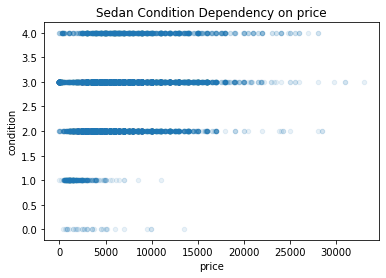

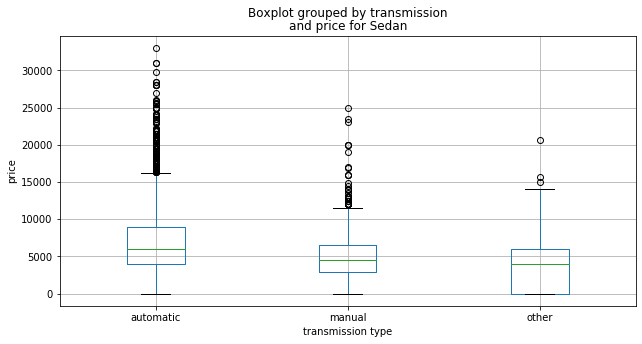

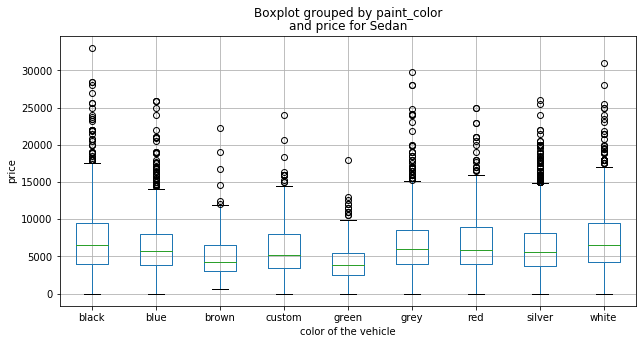

In [10]:
print('Sedan')
display(adtype2['transmission'].value_counts().to_frame())
display(adtype2['paint_color'].value_counts().to_frame())

print('-----------Sedan-----------------')
#Finding correlation between the price and on age, mileage, condition, transmission type, and color of SUVs
print('Correlation between the price and on age: ',adtype2['price'].corr(adtype2['vehicle_age']))
print('Correlation between the price and on mileage: ',adtype2['price'].corr(adtype2['mileage']))
print('Correlation between the price and on condition: ',adtype2['price'].corr(adtype2['condition']))

#Making a different dataframe for Sedan as these ads grouped by color and are less than 50 in number
value_list2 = ['orange','purple','yellow']
boolean_series2 = ~(adtype2.paint_color.isin(value_list2))
sedan_df = adtype2[boolean_series2]


#Sedan Scatter plot graphs for quantitative values
vehicle_age_sedan = adtype2.plot(x='price',y='vehicle_age',kind='scatter', alpha = 0.1, title = 'Sedan Age Dependency on price')
mileage_sedan = adtype2.plot(x='price',y='mileage',kind='scatter', alpha = 0.1, title = 'Sedan Mileage Dependency on price')
condition_sedan = adtype2.plot(x='price',y='condition',kind='scatter', alpha = 0.1, title = 'Sedan Condition Dependency on price')

#Sedan Boxplot for transmission type and paint_color respectively
adtype2.boxplot(column = ['price'], by = 'transmission' ,figsize = (10,5)).set(title='and price for Sedan', xlabel='transmission type', ylabel='price')
sedan_df.boxplot(column = ['price'], by = 'paint_color' ,figsize = (10,5)).set(title='and price for Sedan', xlabel='color of the vehicle', ylabel='price')


<b>Conclusion</b>

 When initially checked for number of ads for each SUV and Sedan according to `vehicle_age`,`mileage`,`transmission`,`paint_color` and `condition`. <br>
- I found out that only `paint_color` for Sedan has less than 50 ads. So for the boxplot I have created a new updated Sedan dataframe with colors apart from those which had less than 50 ads<br>
- Using correlation found out that there is higher dependency of `price` on `age`(lower the age higher the price) as compared to `condition` and `mileage` factors. But still there is some kind of dependency.<br>
- <em>For SUV</em><br>
-we see that there are almost none to non existing outliers for manual and other transmission type vehicles.<br>
-in the `paint_color` and `price` boxplot we notice that there are vehicles with a huge price range for these colors: black, silver, white, yellow, orange. And green, yellow, orange and purple color vehicles have very few outliers<br>
- <em>For Sedan</em><br>
-Just like SUV there are less outliers for manual and other transmission type vehicles as compared to automatic.<br>
in the `paint_color` and `price` boxplot we notice that there are vehicles with a huge price range for these colors: black, silver, white, red, grey. But here we see a significant number of outliers for each color type



<h2>Overall conclusion

Here are the conclusions that I arrived on:
- Greater the mileage, more the vehicles has been used; hence the lower mileage vehicles fetch higher price.
- The older the car, the lower the resale price.
- Personal type vehicles like SUV,Sedan are sold more as compared to commercial vehicles like bus, etc
- The condition of the car makes a great difference to the car’s valuation.  In general, it also gives an idea about how the car’s been driven and taken care of. A clean engine bay and interiors is another factor that adds great value something that an evaluator / buyer would definitely notice. But we rarely see someone selling a vehicle that is like brand new. 
- Classics colors like black, grey, silver, white are more sought after as compared to unconventional colors
- Automatic vehicles are more preferred to manual and even more to other


Thank You!